In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [41]:
df.head()

,index,Order,MS SubClass,MS Zoning,Lot Area,Lot Shape,Land Contour,Lot Config,Neighborhood,Bldg Type,...,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,200,2163,20,RL,9000,Reg,Lvl,Inside,NAmes,1Fam,...,1.998003,381.014258,Y,0,0,7,2007,WD,Normal,158000
1,3832,1862,20,RL,9600,Reg,Lvl,Inside,CollgCr,1Fam,...,1.998003,384.114652,Y,0,0,11,2007,WD,Normal,145000
2,4927,754,20,RL,9600,Reg,Lvl,Inside,NridgHt,1Fam,...,2.998015,625.140330,Y,0,0,5,2008,WD,Normal,125000
3,4088,641,80,RL,9600,Reg,Lvl,Inside,OldTown,1Fam,...,0.998002,193.156275,Y,0,0,7,2006,WD,Normal,135000
4,3644,754,20,RL,9600,Reg,Lvl,Inside,NoRidge,1Fam,...,2.998012,617.903766,Y,0,0,7,2007,WD,Normal,175000


In [42]:
df.dtypes

index               int64
Order               int64
MS SubClass         int64
MS Zoning          object
Lot Area            int64
Lot Shape          object
Land Contour       object
Lot Config         object
Neighborhood       object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Exterior 1st       object
Exterior 2nd       object
Exter Qual         object
Foundation         object
BsmtFin SF 1      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Heating QC         object
Central Air        object
Electrical         object
1st Flr SF          int64
2nd Flr SF          int64
Gr Liv Area         int64
Bsmt Full Bath    float64
Full Bath           int64
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Fireplaces          int64
Garage Cars       float64
Garage Area 

In [85]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

y=df["SalePrice"]

X=df.drop("SalePrice",axis=1)

for column in X.columns:
#     print(titanic[column].shape)
    le = preprocessing.LabelEncoder()
    le.fit(X[column])
    X[column] = le.transform(X[column])
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    )


In [90]:
import lightgbm as lgb

model = lgb.LGBMRegressor() # モデルのインスタンスの作成
model.fit(X_train, y_train) # モデルの学習

# テストデータの予測
y_train_pred=model.predict(X)
y_pred = model.predict(X_test)


In [88]:
(abs(y_pred-y_test)/y_test).mean()

0.11010851477162747

In [91]:
(abs(y_train_pred-y)/y).mean()

0.06419792958923358

In [92]:
df["predict"]=y_train_pred

In [93]:
df.to_csv("df.csv", index = False, header=False)

In [53]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, y_pred))


24761.393179363815

In [55]:
#y_test1=df_test["SalePrice"]
X_test1=df_test

for column in X_test1.columns:
#     print(titanic[column].shape)
    le = preprocessing.LabelEncoder()
    le.fit(X_test1[column])
    X_test1[column] = le.transform(X_test1[column])

y_pred_test = model.predict(X_test1)

In [56]:
y_pred_test

array([147267.47937761, 148953.40874759, 165759.6630858 , ...,
       148083.15520852, 148705.31050955, 148342.93273086])

In [59]:
pd.DataFrame(y_pred_test).to_csv("output.csv", index = False, header=False)

In [58]:
pd.DataFrame(y_pred_test)

,0
0,147267.479378
1,148953.408748
2,165759.663086
3,131914.645610
4,149756.603491
...,...
1995,157993.277034
1996,147399.810335
1997,148083.155209
1998,148705.310510


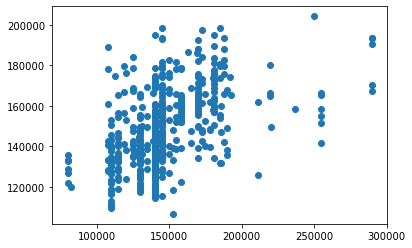

In [60]:
plt.scatter(y_test, y_pred)

In [62]:
len(y_pred-y_test)

600

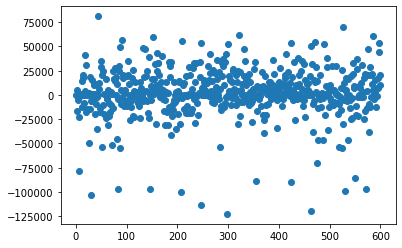

In [65]:
plt.scatter(np.linspace(0, 600, 600),y_pred-y_test)

In [72]:
df1=pd.read_csv("output.csv",header=None)
df1

,0,1
0,398,147267.4794
1,3833,148953.4087
2,4836,165759.6631
3,4572,131914.6456
4,636,149756.6035
...,...,...
1995,3138,157993.2770
1996,191,147399.8103
1997,3294,148083.1552
1998,3073,148705.3105


0       147267.4794
1       148953.4087
2       165759.6631
3       131914.6456
4       149756.6035
           ...     
1995    157993.2770
1996    147399.8103
1997    148083.1552
1998    148705.3105
1999    148342.9327
Name: 1, Length: 2000, dtype: float64

In [82]:
np.where(abs(y_pred-y_test)>50000)

(array([  5,  29,  44,  51,  71,  82,  86,  90, 145, 151, 206, 209, 245,
        246, 284, 297, 299, 320, 354, 423, 424, 462, 463, 471, 475, 488,
        517, 524, 526, 530, 549, 571, 584, 596]),)